## データの作成・前処理

In [1]:
# ライブラリの読み込み
import cv2 # opencv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#警告の非表示
import warnings
warnings.filterwarnings('ignore')

import random

#kerasではバックエンドでTensorFlowを回しているのでkeras使用時は毎回importする。
import tensorflow as tf
import keras

#層構造のモデルを定義するためのメソッド（kerasのモデル構築で必ず使う）
from keras.models import Sequential

# Denseは層の生成メソッド、Activationは活性化関数を定義するためのメソッド
#Flattenは二次元配列を一次元配列に変換する層
from keras.layers import Dense, Activation, Flatten

#SGD：ディープラーニングにおいて最も基本的な最適化手法
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
tf.__version__

'1.14.0'

In [3]:
keras.__version__

'2.2.5'

In [4]:
raw_images=[[None for j in range(5)] for i in range(1000)]

In [5]:
#starの読み込み
raw_images[0] = [cv2.imread('image/image1(star)/star1.png'),
cv2.imread('image/image1(star)/star2.png'),
cv2.imread('image/image1(star)/star3.png'),
cv2.imread('image/image1(star)/star4.png'),
cv2.imread('image/image1(star)/star5.png')]

In [6]:
#sunの読み込み
raw_images[1] = [cv2.imread('image/image2(sun)/sun1.png'),
cv2.imread('image/image2(sun)/sun2.png'),
cv2.imread('image/image2(sun)/sun3.png'),
cv2.imread('image/image2(sun)/sun4.png'),
cv2.imread('image/image2(sun)/sun5.png')]

In [7]:
#catの読み込み
raw_images[2] = [cv2.imread('image/image3(cat)/cat1.png'),
cv2.imread('image/image3(cat)/cat2.png'),
cv2.imread('image/image3(cat)/cat3.png'),
cv2.imread('image/image3(cat)/cat4.png'),
cv2.imread('image/image3(cat)/cat5.png')]

In [8]:
#appleの読み込み
raw_images[3] = [cv2.imread('image/image4(apple)/apple1.png'),
cv2.imread('image/image4(apple)/apple2.png'),
cv2.imread('image/image4(apple)/apple3.png'),
cv2.imread('image/image4(apple)/apple4.png'),
cv2.imread('image/image4(apple)/apple5.png')]

In [9]:
#houseの読み込み
raw_images[4] = [cv2.imread('image/image5(house)/house1.png'),
cv2.imread('image/image5(house)/house2.png'),
cv2.imread('image/image5(house)/house3.png'),
cv2.imread('image/image5(house)/house4.png'),
cv2.imread('image/image5(house)/house5.png')]

In [10]:
#smileの読み込み
raw_images[5] = [cv2.imread('image/image6(smile)/smile1.png'),
cv2.imread('image/image6(smile)/smile2.png'),
cv2.imread('image/image6(smile)/smile3.png'),
cv2.imread('image/image6(smile)/smile4.png'),
cv2.imread('image/image6(smile)/smile5.png')]

In [11]:
#cubeの読み込み
raw_images[6] = [cv2.imread('image/image7(cube)/cube1.png'),
cv2.imread('image/image7(cube)/cube2.png'),
cv2.imread('image/image7(cube)/cube3.png'),
cv2.imread('image/image7(cube)/cube4.png'),
cv2.imread('image/image7(cube)/cube5.png')]

In [12]:
#cupの読み込み
raw_images[7] = [cv2.imread('image/image8(cup)/cup1.png'),
cv2.imread('image/image8(cup)/cup2.png'),
cv2.imread('image/image8(cup)/cup3.png'),
cv2.imread('image/image8(cup)/cup4.png'),
cv2.imread('image/image8(cup)/cup5.png')]

In [13]:
#Ryomaの読み込み
raw_images[8] = [cv2.imread('image/image9(Ryoma)/Ryoma1.png'),
cv2.imread('image/image9(Ryoma)/Ryoma2.png'),
cv2.imread('image/image9(Ryoma)/Ryoma3.png'),
cv2.imread('image/image9(Ryoma)/Ryoma4.png'),
cv2.imread('image/image9(Ryoma)/Ryoma5.png')]

In [14]:
#keyの読み込み
raw_images[9] = [cv2.imread('image/image10(key)/key1.png'),
cv2.imread('image/image10(key)/key2.png'),
cv2.imread('image/image10(key)/key3.png'),
cv2.imread('image/image10(key)/key4.png'),
cv2.imread('image/image10(key)/key5.png')]

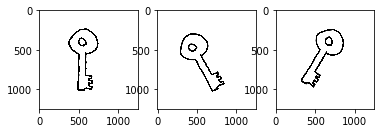

In [15]:
#回転

# 表示する画像のサイズ(変換前と同じサイズに指定)
size = (raw_images[0][0].shape[0], raw_images[0][0].shape[1])
# 回転の中心位置を表す座標（画像の中心に指定）
center = (int(size[0]/2), int(size[1]/2))

# 拡大･縮小の比率（拡大･縮小なしに指定）
scale = 1.0

angle=[None]*11
rotation_matrix=[None]*11

for k in range(11):
    for i in range(10):
        for j in range(5):
            # 回転角度
            angle[k] = 30*(k+1)
            # 回転変換を表す行列をつくる
            # (中心位置, 回転角度, 拡大･縮小の比率)
            rotation_matrix[k] = cv2.getRotationMatrix2D(center, angle[k], scale)
            # 回転変換を行う
            # (画像, 回転行列, 変換後の画像サイズ)
            raw_images[i+10*(k+1)][j] = cv2.warpAffine(raw_images[i][j], rotation_matrix[k],raw_images[i][j].shape[0:2],borderValue=(255,255,255))

# rotateを行う前の画像を出力
plt.subplot(1, 3, 1)
plt.imshow(raw_images[9][0])
# rotateを行った後の画像を出力
plt.subplot(1, 3, 2)
plt.imshow(raw_images[19][0])
plt.subplot(1, 3, 3)
plt.imshow(raw_images[119][0])


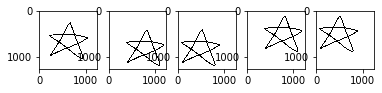

In [16]:
#並進移動
#変換後の画像サイズを指定
#変換行列
M1 = np.float32([[1,0,150],[0,1,150]])
M2 = np.float32([[1,0,-150],[0,1,150]])
M3 = np.float32([[1,0,150],[0,1,-150]])
M4 = np.float32([[1,0,-150],[0,1,-150]])
#並進移動の実行
for i in range(110):
    for j in range(5):
        raw_images[i+110][j] = cv2.warpAffine(raw_images[i][j],M1,raw_images[i][j].shape[0:2],borderValue=(255,255,255))
        raw_images[i+220][j] = cv2.warpAffine(raw_images[i][j],M2,raw_images[i][j].shape[0:2],borderValue=(255,255,255))
        raw_images[i+330][j] = cv2.warpAffine(raw_images[i][j],M3,raw_images[i][j].shape[0:2],borderValue=(255,255,255))
        raw_images[i+440][j] = cv2.warpAffine(raw_images[i][j],M4,raw_images[i][j].shape[0:2],borderValue=(255,255,255))

#並進移動を行う前の画像を出力
plt.subplot(1,5,1)
plt.imshow(raw_images[0][0])
#並進移動を行った後の画像を出力
plt.subplot(1,5,2)
plt.imshow(raw_images[110][0])
plt.subplot(1,5,3)
plt.imshow(raw_images[220][0])
plt.subplot(1,5,4)
plt.imshow(raw_images[330][0])
plt.subplot(1,5,5)
plt.imshow(raw_images[440][0])

In [17]:

# grayed_images=[[None for j in range(5)] for i in range(550)]

# グレースケール化の実行
for i in range(550):
    for j in range(5):
        raw_images[i][j] = cv2.cvtColor(raw_images[i][j],cv2.COLOR_RGB2GRAY)

    
# # グレースケール化を行う前の画像を出力
# plt.subplot(1, 2, 1)
# plt.imshow(raw_images[0][0], interpolation='nearest')
# # グレースケール化を行った後の画像を出力
# plt.subplot(1, 2, 2)
# plt.imshow(grayed_images[0][0])
# plt.gray()



In [18]:
# 画像のリサイズ
# (画像, 変換後のサイズを表すタプル)
# raw_images=[[None for j in range(5)] for i in range(550)]

for i in range(550):
    for j in range(5):
        raw_images[i][j] = cv2.resize(raw_images[i][j], (64, 64))

# # リサイズを行う前の画像を出力
# plt.subplot(1, 2, 1)
# plt.imshow(raw_images[2][0])
# # リサイズを行った後の画像を出力
# plt.subplot(1, 2, 2)
# plt.imshow(raw_images[2][0])


## 配列の結合

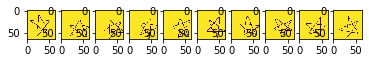

In [19]:
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(raw_images[100+i*10][0])

In [20]:
#starはすべて結合
for j in range(54):
    raw_images[0].extend(raw_images[10*(j+1)])
    raw_images[10*(j+1)] = None

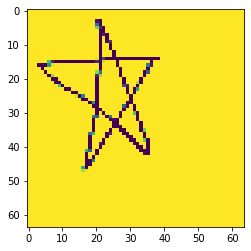

In [21]:
plt.imshow(raw_images[0][274])

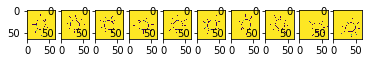

In [22]:
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(raw_images[31+i*10][0])

In [23]:
#sunもすべて結合
for j in range(54):
    raw_images[1].extend(raw_images[1+10*(j+1)])
    raw_images[1+10*(j+1)] = None

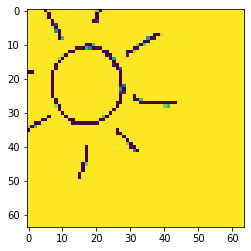

In [24]:
plt.imshow(raw_images[1][274])

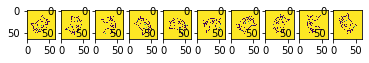

In [25]:
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(raw_images[12+i*10][0])

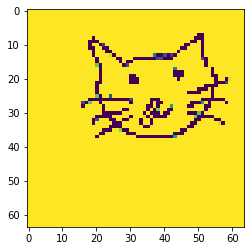

In [26]:
plt.imshow(raw_images[332][0])

In [27]:
#catは(-30)0から30°まで結合
for j in range(4):
    #0°のcat
    raw_images[2].extend(raw_images[112+110*j])
    raw_images[112+110*j]=None
for j in range(5):
    #30°のcat
    raw_images[2].extend(raw_images[12+110*j])
    #-30°のcat
    raw_images[2].extend(raw_images[102+110*j])
    raw_images[12+110*j]=None
    raw_images[102+110*j]=None


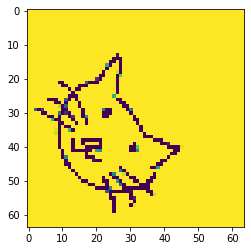

In [28]:
plt.imshow(raw_images[2][50])

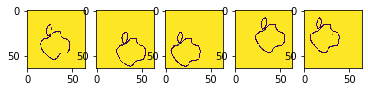

In [29]:
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(raw_images[13+110*i][0])

In [30]:
#appleも(-30)0から30°まで結合
for j in range(4):
    #0°のapple
    raw_images[3].extend(raw_images[113+110*j])
    raw_images[113+110*j]=None
for j in range(5):
    #30°のapple
    raw_images[3].extend(raw_images[13+110*j])
    #-30°のapple
    raw_images[3].extend(raw_images[103+110*j])
    raw_images[13+110*j]=None
    raw_images[103+110*j]=None


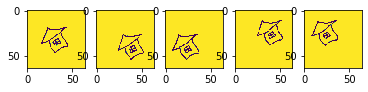

In [31]:
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(raw_images[14+110*i][0])

In [32]:
#houseも(-30)0から30°まで結合
for j in range(4):
    #0°のhouse
    raw_images[4].extend(raw_images[114+110*j])
    raw_images[114+110*j]=None
for j in range(5):
    #30°のhouse
    raw_images[4].extend(raw_images[14+110*j])
    #-30°のhouse
    raw_images[4].extend(raw_images[104+110*j])
    raw_images[14+110*j]=None
    raw_images[104+110*j]=None


In [33]:
#smileも(-30)0から30°まで結合
for j in range(4):
    #0°のsmile
    raw_images[5].extend(raw_images[115+110*j])
    raw_images[115+110*j]=None
for j in range(5):
    #30°のsmile
    raw_images[5].extend(raw_images[15+110*j])
    #-30°のsmile
    raw_images[5].extend(raw_images[105+110*j])
    raw_images[15+110*j]=None
    raw_images[105+110*j]=None

In [34]:
#cubeも(-30)0から30°まで結合
for j in range(4):
    #0°のcube
    raw_images[6].extend(raw_images[116+110*j])
    raw_images[116+110*j]=None
for j in range(5):
    #30°のcube
    raw_images[6].extend(raw_images[16+110*j])
    #-30°のcube
    raw_images[6].extend(raw_images[106+110*j])
    raw_images[16+110*j]=None
    raw_images[106+110*j]=None

In [35]:
#cupも(-30)0から30°まで結合
for j in range(4):
    #0°のcup
    raw_images[7].extend(raw_images[117+110*j])
    raw_images[117+110*j]=None
for j in range(5):
    #30°のcup
    raw_images[7].extend(raw_images[17+110*j])
    #-30°のcup
    raw_images[7].extend(raw_images[107+110*j])
    raw_images[17+110*j]=None
    raw_images[107+110*j]=None

In [36]:
#Ryomaもすべて結合
for j in range(54):
    raw_images[8].extend(raw_images[8+10*(j+1)])
    raw_images[8+10*(j+1)] = None

In [37]:
#keyもすべて結合
for j in range(54):
    raw_images[9].extend(raw_images[9+10*(j+1)])
    raw_images[9+10*(j+1)] = None

In [38]:
while 1:
    try:
        raw_images.remove(None)
    except:
        break
images=raw_images[:250]
images

[[array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255,

In [39]:
x=[]
y=[]
for imglist in images:
    for imgA in imglist:
        for imgB in imglist:
            x.append(np.array([imgA,imgB]))
            y.append(1)
print(len(x))
for i in range(len(images)):
    imglist=images[i]
    for img in imglist:
        for i in range(len(imglist)):
            index=i
            while index==i:
                index=random.randrange(len(images))
            pair=random.choice(images[index])
            x.append(np.array([img,pair]))
            y.append(0)
len(x)

342250


684500

## CNNによる学習の実行

In [40]:
#インポート
import keras
#階層構造のモデルを定義するためのメソッド
from keras.models import Sequential
#Denseは層の生成メソッド、Activationは活性化関数を定義するためのメソッド
from keras.layers import Dense, Activation
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers import Flatten
from keras.optimizers import Adam
import tensorflow as tf

In [41]:
#モデルの定義

#-------
#CNNモデル
#-------

model = Sequential()

model.add(Conv2D(filters=64, input_shape=(64, 64, 2), kernel_size=(4, 4), strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(filters=128, kernel_size=(4, 4), strides=(1,1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(filters=128, kernel_size=(4, 4), strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(filters=128, kernel_size=(4, 4), strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [42]:
# 同様に学習前にコンパイルします。
model.compile(loss='mean_squared_error',
              optimizer=Adam(),
              metrics=['accuracy'])

# ミニバッチに含まれるサンプル数を指定
batch_size = 500

# epoch数を指定
n_epoch = 30

In [43]:
np.array(raw_images).shape

(700,)